In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, validation_curve
from math import sqrt
% matplotlib inline 

pd.options.display.max_columns = 999
df_s = pd.read_csv("energy_data_variables_final_normalized.csv", usecols = ['DOLLAREL', 'DRYRUSEM', 'USEWASHM', 'TOTROOMS', 'LGTOUTNUM', 'BEDROOMS', 'DRYRFUEL', 'TOTSQFT_EN', 'NUMCFAN', 'TVCOLOR', 'WINDOWS', 'NCOMBATH', 'LGTINNUM', 'ELWATER', 'FUELH2O', 'OTHROOMS', 'WHEATAGE', 'NUMFRIG', 'NHSLDMEM', 'AGERFRI2', 'LOCRFRI2', 'FUELHEAT', 'THERMAINAC', 'NUMFREEZ', 'KWH_M'])

In [2]:
# Check Shape of DataFrame
df_s.shape

(5686, 25)

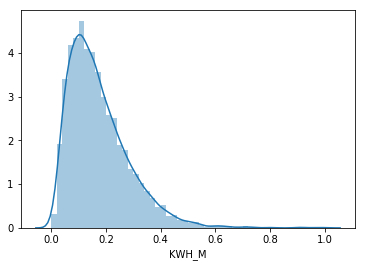

In [3]:
# Check distribution skewness for the target variable (KWH_M)
ax = sns.distplot(df_s.KWH_M)
plt.show()

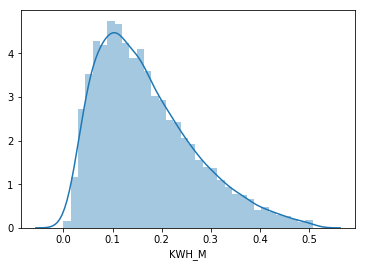

In [4]:
# Remove outliers that are more than 3 standard deviations from the mean 
df_s = df_s[np.abs(df_s["KWH_M"]-df_s["KWH_M"].mean())<=(3*df_s["KWH_M"].std())]

# Re-check distribution skewness for the target variable (KWH_M)
ax = sns.distplot(df_s.KWH_M)
plt.show()

In [5]:
# Set X, Y Variables

X = df_s.values[:, 0:24]
Y = df_s.values[:, 24]

In [6]:
parameters={'alpha': [0.1, 5,10,15,20,100]}
rdg_reg = Ridge()
grid_obj = GridSearchCV(rdg_reg,parameters,cv=10, scoring = 'r2', verbose = 1)
grid_obj.fit(X, Y)
results = pd.DataFrame(grid_obj.cv_results_)
print (results)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.010797         0.000399         0.822874          0.826645   
1       0.003092         0.000366         0.815861          0.819208   
2       0.003737         0.000413         0.801684          0.804936   
3       0.003315         0.000414         0.786112          0.789373   
4       0.003182         0.000343         0.771053          0.774353   
5       0.003142         0.000367         0.646053          0.649522   

  param_alpha          params  rank_test_score  split0_test_score  \
0         0.1  {'alpha': 0.1}                1           0.831925   
1           5    {'alpha': 5}                2           0.823400   
2          10   {'alpha': 10}                3           0.809639   
3          15   {'alpha': 15}                4           0.795124   
4          20   {'alpha': 20}                5           0.781272   
5         100  {'alp

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_tr

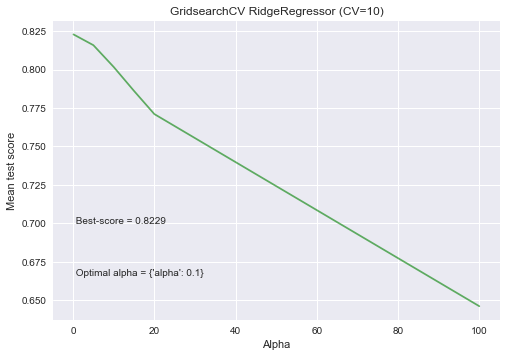

In [7]:
# Plot a Visual of the Optimal Alpha 
%matplotlib inline
plt.style.use('seaborn')
plt.plot(results['param_alpha'], results['mean_test_score'], 'g-', alpha=0.6)
plt.text(0,0.7, ' Best-score = {}'.format(round(float(grid_obj.best_score_), 4)))
plt.text(0,0.666, ' Optimal alpha = {}'.format(grid_obj.best_params_))
plt.xlabel("Alpha")
plt.ylabel("Mean test score")
plt.title('GridsearchCV RidgeRegressor (CV=10)')
plt.show()

In [8]:
parameters={'alpha': [0.1, 5,10,15,20,100]}
rdg_reg = Ridge()
grid_obj = GridSearchCV(rdg_reg,parameters,cv=10, scoring = 'neg_mean_squared_error', verbose = 1)
grid_obj.fit(X, Y)
results = pd.DataFrame(grid_obj.cv_results_)
print (results)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.004000         0.000427        -0.001753         -0.001723   
1       0.002986         0.000299        -0.001823         -0.001797   
2       0.006980         0.000354        -0.001964         -0.001939   
3       0.003963         0.000377        -0.002118         -0.002094   
4       0.003458         0.000342        -0.002268         -0.002243   
5       0.007373         0.001173        -0.003507         -0.003484   

  param_alpha          params  rank_test_score  split0_test_score  \
0         0.1  {'alpha': 0.1}                1          -0.001789   
1           5    {'alpha': 5}                2          -0.001880   
2          10   {'alpha': 10}                3          -0.002027   
3          15   {'alpha': 15}                4          -0.002181   
4          20   {'alpha': 20}                5          -0.002329   
5         100  {'alp

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished
/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_tr

In [9]:
# Calculate RMSE
ridge = Ridge(alpha=0.1)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = cross_val_score(ridge, X, Y, cv=shuffle, scoring = "neg_mean_squared_error")
mse_scores1 = -mse_scores 
rmse_scores = np.sqrt(mse_scores1)

print ("The RMSE scores are %s" 
       % (rmse_scores))
print ("The mean of the RMSE scores is %f" 
       %(rmse_scores.mean()))

The RMSE scores are [0.04063931 0.03937707 0.04724933 0.04001346 0.04300388 0.04130134
 0.04101916 0.04016599 0.04446854 0.04007554]
The mean of the RMSE scores is 0.041731


In [10]:
# Calculate MAE  
from sklearn.metrics import mean_absolute_error

ridge = Ridge(alpha=0.1)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
mae_scores = cross_val_score(ridge, X, Y, cv=shuffle, scoring = "neg_mean_absolute_error")
mae_scores_ = -mae_scores

print ("The MAE scores are %s" 
       % (mae_scores_))
print ("The mean of the MAE scores is %f" 
       %(mae_scores_.mean()))

The MAE scores are [0.02922698 0.02861325 0.03153369 0.029522   0.02972687 0.02963095
 0.02887709 0.02862291 0.03171604 0.02816267]
The mean of the MAE scores is 0.029563


In [11]:
# Calculate VAR

ridge = Ridge(alpha=0.1)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

ev_scores = cross_val_score(ridge, X, Y, cv=shuffle, scoring = "explained_variance")

print ("The explained variance scores are %s" 
       % (ev_scores))
print ("The mean of the explained variance scores is %f" 
       %(ev_scores.mean()))

The explained variance scores are [0.82979459 0.85458789 0.78931777 0.82835584 0.80702881 0.8061706
 0.820158   0.8431936  0.79996584 0.85610263]
The mean of the explained variance scores is 0.823468


In [12]:
# Calculate R2 

ridge = Ridge(alpha=0.1)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

r_scores = cross_val_score(ridge, X, Y, cv=shuffle, scoring = "r2")

print ("The R2 scores are %s" 
       % (r_scores))
print ("The mean of the R2 scores is %f" 
       %(r_scores.mean()))

The R2 scores are [0.82953933 0.8542019  0.78929309 0.82834635 0.80687917 0.80612117
 0.81979234 0.84290517 0.79983851 0.85609966]
The mean of the R2 scores is 0.823302


Text(0.5,1,'Ridge Regression')

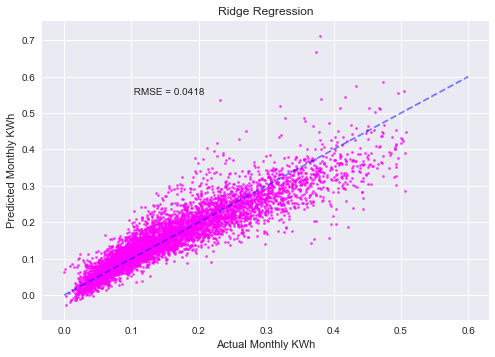

In [15]:
# Plot the Predict vs. Actual Values Using CrossValPredict
from sklearn.model_selection import cross_val_predict
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
predicted_ridge = cross_val_predict(ridge, X, Y, cv=shuffle)

%matplotlib inline
plt.style.use('seaborn')
plt.scatter(Y, predicted_ridge, s = 5, color = 'magenta', alpha = 0.8)
plt.plot([0,0.6], [0,0.6], "b--", color = "blue", alpha = 0.5)
plt.xlabel("Actual Monthly KWh")
plt.ylabel("Predicted Monthly KWh")
plt.text(0.1,0.55, ' RMSE = {}'.format(round(sqrt(mean_squared_error(Y, predicted_ridge)), 4)))
plt.title('Ridge Regression')